In [18]:
import torch
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# Load Model Outputs

In [19]:
iteration_id, batch_id = 0, 14

In [20]:
# Load the file
pt_file = torch.load("experiments/SINDDataset_evaluation_2024-03-07_outputs_all/outut_data.pt")

# Print the head of the file
print(pt_file.keys())

dict_keys(['target_masks', 'targets', 'predictions', 'metrics', 'IDs', 'embeddings', 'embeddings_original'])


In [21]:
print(len(pt_file['embeddings'])) # (37, 256, 60, 128) -> number of batches, batch size, chunck size, embedding size
print(len(pt_file['embeddings'][0]))
print(len(pt_file['embeddings'][0][0]))
print(len(pt_file['embeddings'][0][0][0]))

37
256
60
128


In [22]:
len(pt_file['embeddings'][0][0])

60

In [25]:
all_data = np.concatenate(pt_file['targets'], axis=0)
all_embeddings = np.concatenate(pt_file['embeddings'], axis=0)

# Display Data in Map

In [26]:
import osmium as osm
from src.datasets.plot import SinDMap
from shapely.geometry import Point
# from example_code.data.poly_process import crosswalk_poly_for_label as cpfl

In [27]:
class OSMHandler(osm.SimpleHandler):
    def __init__(self):
        osm.SimpleHandler.__init__(self)
        self.nodes = []

    def node(self, n):
        self.nodes.append((n.location.lat, n.location.lon))

handler = OSMHandler()
handler.apply_file('resources/SinD/Data/mapfile-Tianjin.osm')

In [28]:
# print map
# fig, ax = plt.subplots()
# fig.set_size_inches(6.5, 4.13)
# fig.subplots_adjust(top=0.95, left=0.08, bottom=0.1, right=0.95)
# map = SinD_map() # cpfl(map)
# ax = map.plot_areas(ax=ax)
# plt.show()

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


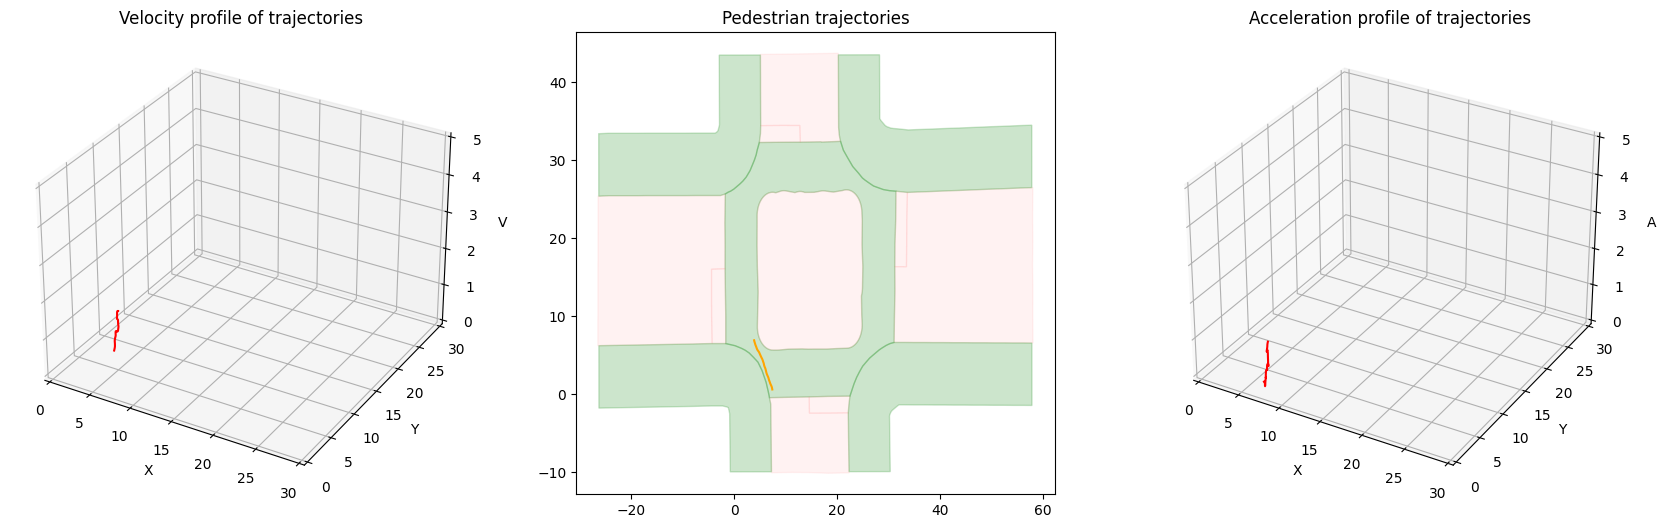

In [29]:
map = SinDMap()
map.plot_single_data(pedestrian_data={batch_id: pd.DataFrame(pt_file['targets'][iteration_id][batch_id], columns=["x", "y", "vx", "vy", "ax", "ay"])})

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


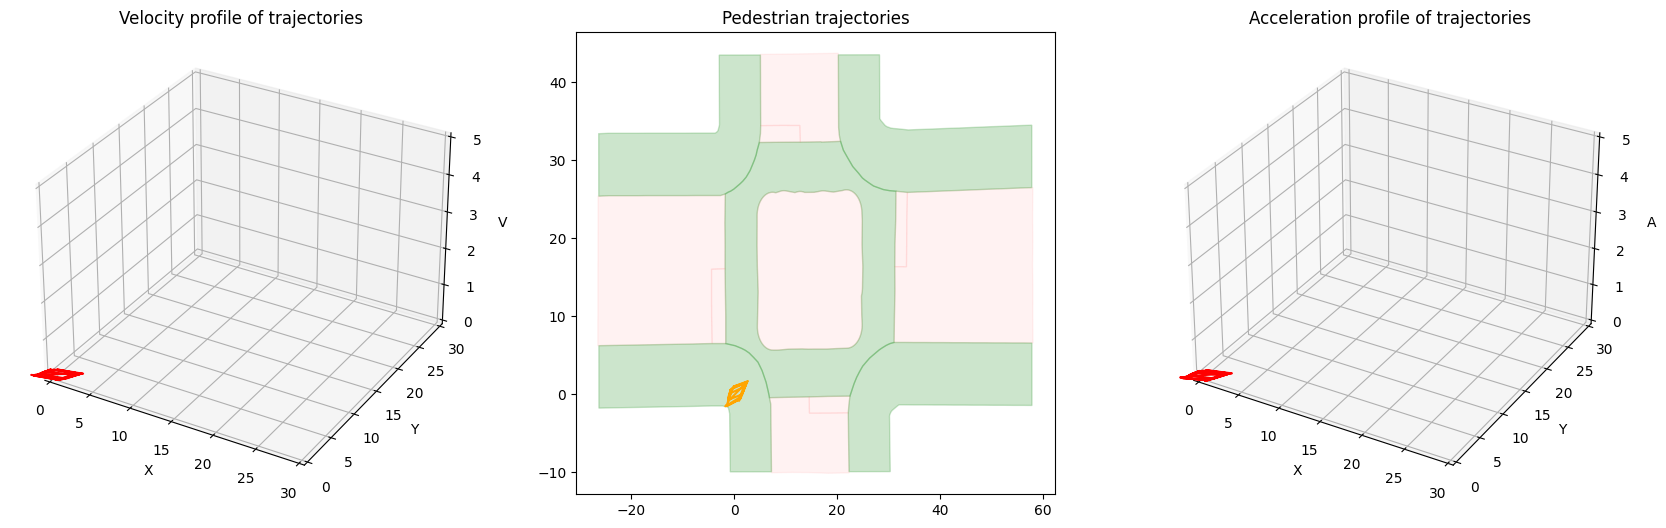

In [30]:
map.plot_single_data(pedestrian_data={batch_id: pd.DataFrame(pt_file['predictions'][iteration_id][batch_id], columns=["x", "y", "vx", "vy", "ax", "ay"])})

In [31]:
# projected_down_embedding = TSNE(n_components=6, method='exact').fit_transform(pt_file['embeddings_original'][iteration_id][batch_id])
# map.plot_single_data(pedestrian_data={batch_id: pd.DataFrame(projected_down_embedding, columns=["x", "y", "vx", "vy", "ax", "ay"])})

In [32]:
# projected_down_embedding = TSNE(n_components=6, method='exact').fit_transform(pt_file['embeddings'][iteration_id][batch_id])
# map.plot_single_data(pedestrian_data={batch_id: pd.DataFrame(projected_down_embedding, columns=["x", "y", "vx", "vy", "ax", "ay"])})

### Full Dataset

In [33]:
trajectories_per_sidewalk = {0: [], 1: [], 2: [], 3: []}
rest_trajectories = {'gap': [], 'road': [], 'inter': [], 'crosswalk': []}
for key, trajectory in enumerate(all_data):
    trajectory = pd.DataFrame(trajectory, columns=["x", "y", "vx", "vy", "ax", "ay"])
    _trajectory_x, _trajectory_y = np.array(trajectory['x']), np.array(trajectory['y'])
    start_point = Point((_trajectory_x[0], _trajectory_y[0]))
    for i in range(0, 4):
        if start_point.within(map.sidewalk_poly[i]) or start_point.touches(map.sidewalk_poly[i]):
            trajectories_per_sidewalk[i].append(key)
    
    if not start_point.within(map.sidewalk_poly) and not start_point.touches(map.sidewalk_poly):
        if start_point.within(map.gap_poly) or start_point.touches(map.gap_poly):
            rest_trajectories['gap'].append(key)
        if start_point.within(map.road_poly) or start_point.touches(map.road_poly):
            rest_trajectories['road'].append(key)
        if start_point.within(map.intersection_poly) or start_point.touches(map.intersection_poly):
            rest_trajectories['inter'].append(key)
        if start_point.within(map.crosswalk_poly) or start_point.touches(map.crosswalk_poly):
            rest_trajectories['crosswalk'].append(key)

/tmp/ipykernel_120754/929498283.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if start_point.within(map.sidewalk_poly[i]) or start_point.touches(map.sidewalk_poly[i]):


/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


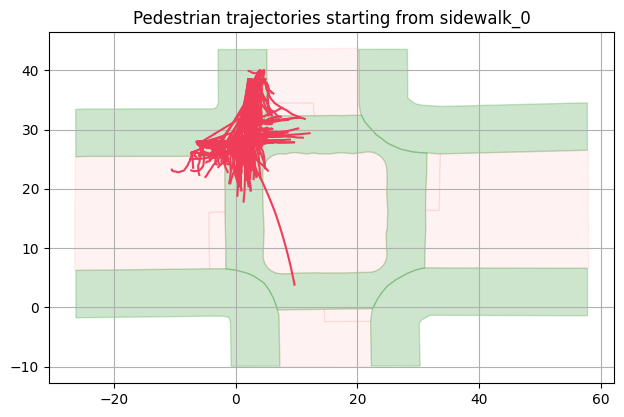

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


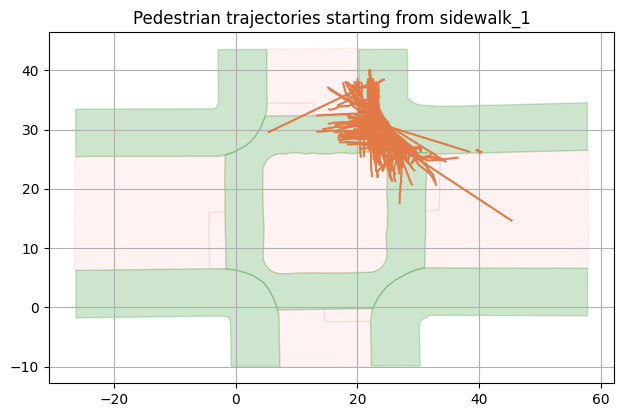

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


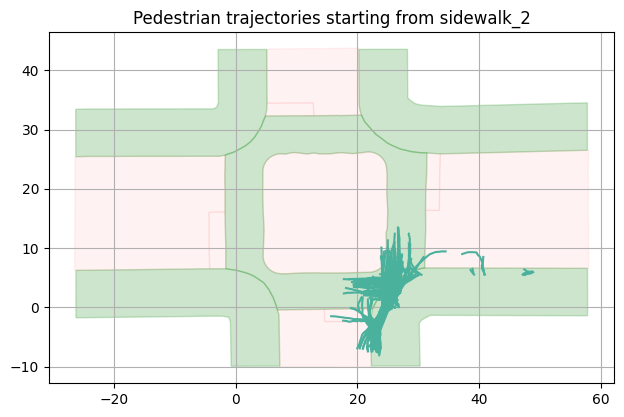

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


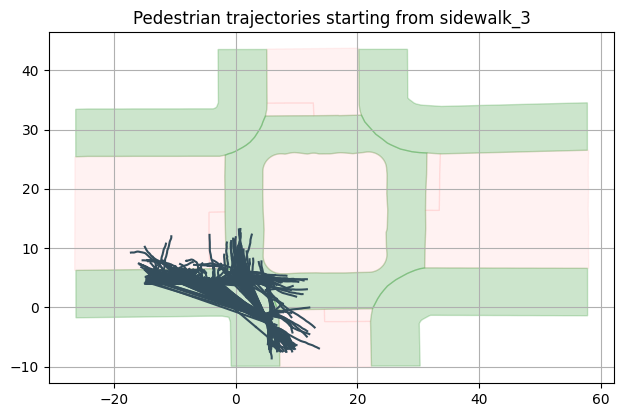

In [34]:
COLOR_PALETE = ['#EF3D59', '#E17A47', '#4AB19D',  '#344E5C']
for sidewalk_id, pedestrian_ids in trajectories_per_sidewalk.items():
    # Gather pedestrian data for this sidewalk
    sidewalk_pedestrian_data = {pid: all_data[pid] for pid in pedestrian_ids}

    # Plot the data for this sidewalk
    plot = map.plot_dataset(pedestrian_data=sidewalk_pedestrian_data, color=COLOR_PALETE[sidewalk_id], title=f'sidewalk_{sidewalk_id}')


# Clustering

In [49]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [50]:
COLOR_PALETE = ['#EF3D59', '#E17A47', '#EFC958', '#4AB19D',  '#344E5C', '#A6206A', '#568EA6', '#A2D4AB', '#5A5050']
n_clusters =5

In [51]:
pd.set_option('display.max_columns', None)

In [52]:
# # Find right number of clusters
# for n_ in range(2, 26):
#     kmeans = KMeans(n_clusters=n_)  # clusters
#     df['cluster'] = kmeans.fit_predict(df)

#     score = silhouette_score(df.iloc[:, :-1], df['cluster'])
#     print("Silhouette Score: ", score, ", n_clusters:", n_)

In [53]:
# kmeans = KMeans(n_clusters=n_clusters)  # clusters
# df['cluster'] = kmeans.fit_predict(all_data)

# score = silhouette_score(df.iloc[:, :-1], df['cluster'])
# print("Silhouette Score: ", score)

In [63]:
# # Flatten the sequence_length and features dimensions
# flattened_data = all_data.reshape(all_data.shape[0], -1)

# # Reduce the dimensionality for visualization/clustering
# pca = PCA(n_components=2)  # Use 3 for 3D visualization
# reduced_data = pca.fit_transform(flattened_data)

# # Perform K-Means clustering
# kmeans = KMeans(n_clusters=3)  # Choose an appropriate number of clusters
# flattened_data['clusters'] = kmeans.fit_predict(reduced_data)

# # Now `clusters` contains the cluster assignment for each sequence in your batch

# # centroids = kmeans.cluster_centers_
# # centroids_df = pd.DataFrame(centroids, columns=df.columns[:-1])  # Assuming the last column is 'cluster'
# # cluster_sizes = flattened_data['cluster'].value_counts()
# # cluster_profiles = df.groupby('cluster').mean()

In [62]:
# # Creating a 3D scatter plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Extracting the cluster names and colors
# clusters = flattened_data['clusters'].unique()
# colors = COLOR_PALETE if n_clusters <= len(COLOR_PALETE) else sns.color_palette('tab20', len(clusters))  # Tab20 colormap with 20 unique colors

# for cluster, color in zip(clusters, colors):
#     cluster_data = df_pca[df_pca['clusters'] == cluster]
#     ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], s=.6, alpha=0.6, label=f'Cluster {cluster}', color=color)


In [48]:
# # Set the threshold for highlighting
# threshold = 0.1

# # Number of principal components
# num_pcs = 3

# plt.figure(figsize=(num_pcs*7, 8))

# # Iterate through the first three PCs
# for i in range(num_pcs):
#     ax = plt.subplot(1, num_pcs, i+1)
#     bars = ax.barh(df.columns, loadings[i, :])
    
#     # Color feature names red if the bar is above 0.2
#     # Color feature names red if the bar is above 0.2 and adjust x-tick labels
#     for bar, label in zip(bars, ax.get_yticklabels()):
#         label.set_color('red' if abs(bar.get_width()) > threshold else 'black')


#      # Add a red horizontal line at the threshold
#     ax.axvline(x=threshold, color='red', linestyle='--')
#     ax.axvline(x=-threshold, color='red', linestyle='--')  # For negative values
    
#     ax.set_yticklabels(df.columns, ha='right')

#     plt.xlabel('Loading')
#     plt.title(f'Loadings for PC{i+1}')

# plt.tight_layout()
# plt.show()